In [1]:
# IMPORTS
from helper import merge_dataframes
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file1_path = 'data/NewYorkCars/New_York_cars_part1.csv'
file2_path = 'data/NewYorkCars/New_York_cars_part2.csv'


df = merge_dataframes(file1_path, file2_path)

In [4]:
columns = df.columns
# ['new&used', 'name', 'money', 'Exterior color', 'Interior color','Drivetrain', 'MPG', 'Fuel type', 'Transmission', 'Engine', 'Mileage',
# 'Convenience', 'Entertainment', 'Exterior', 'Safety', 'Seating','Accidents or damage', 'Clean title', '1-owner vehicle','Personal use only',
#  'brand', 'Year', 'Model', 'currency']

## Add Costum Columns
# Add Age Column
max_year_value = df['Year'].max()
df['Age'] = max_year_value - df['Year']

# Change Column Money to int
df['money'] = df['money'].astype(str)

# Remove the decimal point from the values and store them as integers
df['money'] = df['money'].str.replace('.', '', regex=False).astype(int)

In [5]:
numbers_in_name = df['name'].str[:4].astype(int)

mismatched_values = df.loc[numbers_in_name != df['Year'], ['name', 'Year']]

if not mismatched_values.empty:
    print("Nicht übereinstimmende Werte:")
    print(mismatched_values)
else:
    print("Keine nicht übereinstimmenden Werte gefunden.")

Keine nicht übereinstimmenden Werte gefunden.


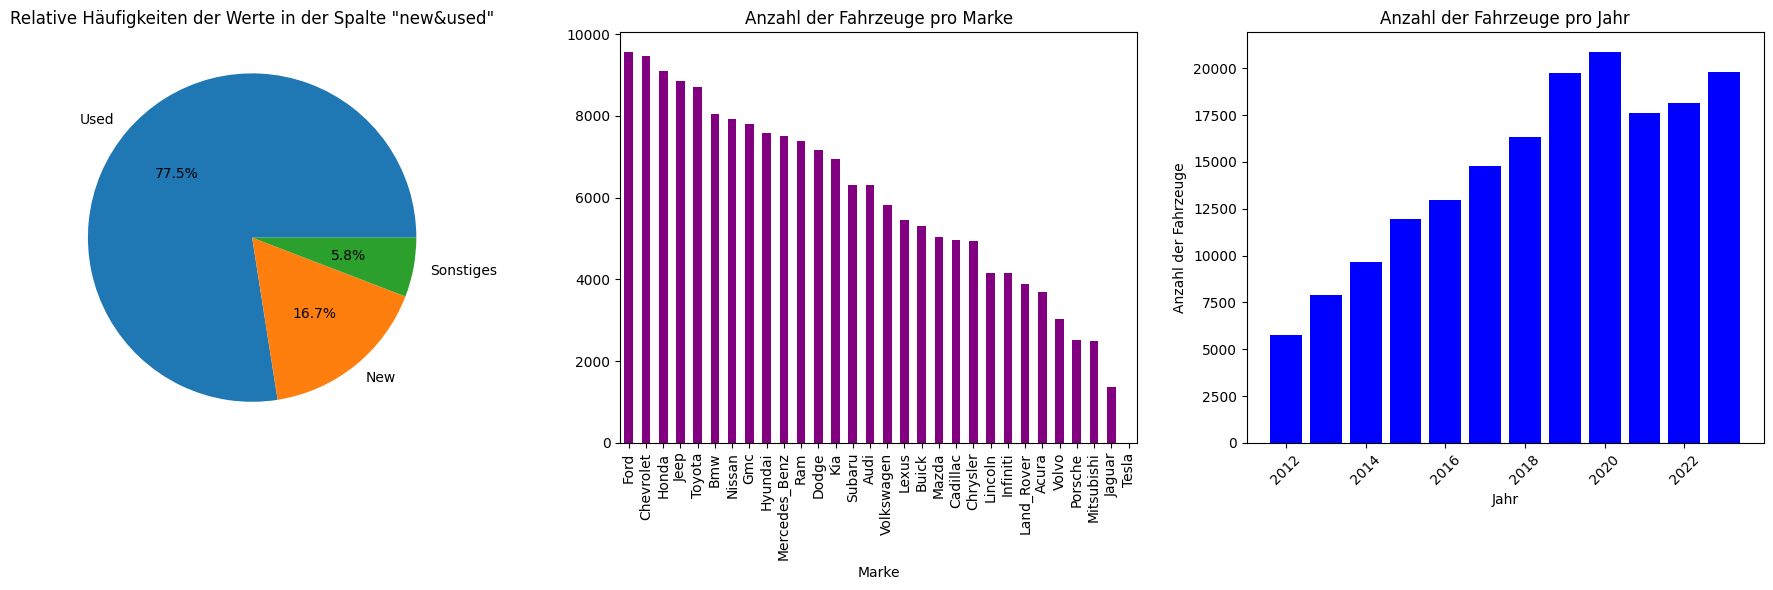

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

relative_frequencies = df['new&used'].value_counts(normalize=True)
filtered_frequencies = relative_frequencies[relative_frequencies > 0.01]
sum_others = relative_frequencies[relative_frequencies <= 0.01].sum()
filtered_frequencies['Sonstiges'] = sum_others

ax1.pie(filtered_frequencies.values, labels=filtered_frequencies.index, autopct='%1.1f%%')
ax1.set_title('Relative Häufigkeiten der Werte in der Spalte "new&used"')

brand_counts = df['brand'].value_counts()
brand_counts.plot(kind='bar', color='purple', ax=ax2)
ax2.set_title('Anzahl der Fahrzeuge pro Marke')
ax2.set_xlabel('Marke')

year_counts = df['Year'].value_counts().sort_index()
ax3.bar(year_counts.index, year_counts.values, color='blue')
ax3.set_xlabel('Jahr')
ax3.set_ylabel('Anzahl der Fahrzeuge')
ax3.set_title('Anzahl der Fahrzeuge pro Jahr')
ax3.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3)

# Text hinzufügen


plt.tight_layout()

# Subplots anzeigen
plt.show()


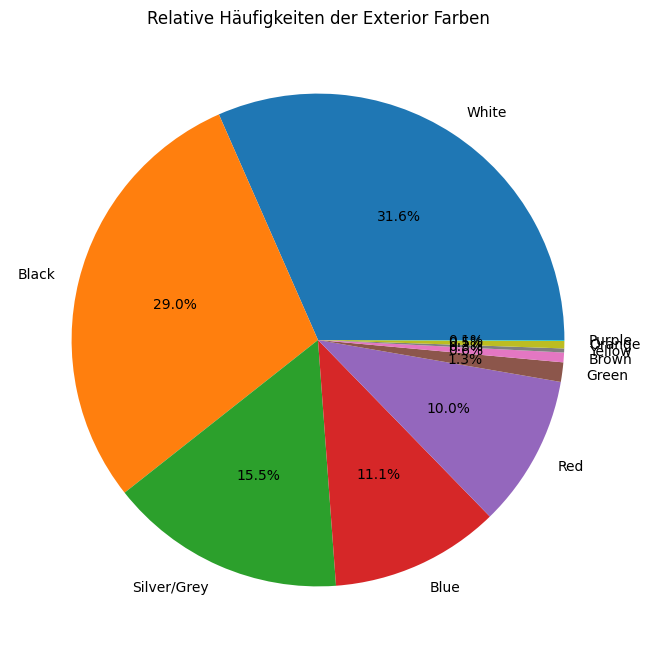

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Relative Häufigkeiten der Exterior Farben berechnen
relative_frequencies = df['Exterior color'].value_counts(normalize=True)

# Farben zusammenfassen
merged_frequencies = pd.Series(dtype=float)
color_groups = {}

# Definition der Farbgruppen und deren Namen
color_groups = {
    'White': ['white'],
    'Black': ['black'],
    'Silver/Grey': ['silver', 'grey'],
    'Blue': ['blue'],
    'Red': ['red'],
    'Green': ['green'],
    'Brown': ['brown'],
    'Yellow': ['yellow'],
    'Orange': ['orange'],
    'Purple': ['purple'],
}

# Zusammenfassen der Farben in den Farbgruppen
for group, colors in color_groups.items():
    merged_frequency = relative_frequencies[relative_frequencies.index.str.contains('|'.join(colors), case=False)].sum()
    merged_frequencies[group] = merged_frequency

# Pie Chart erstellen
plt.figure(figsize=(8, 8))
plt.pie(merged_frequencies.values, labels=merged_frequencies.index, autopct='%1.1f%%')
plt.title('Relative Häufigkeiten der Exterior Farben')

# Diagramm anzeigen
plt.show()


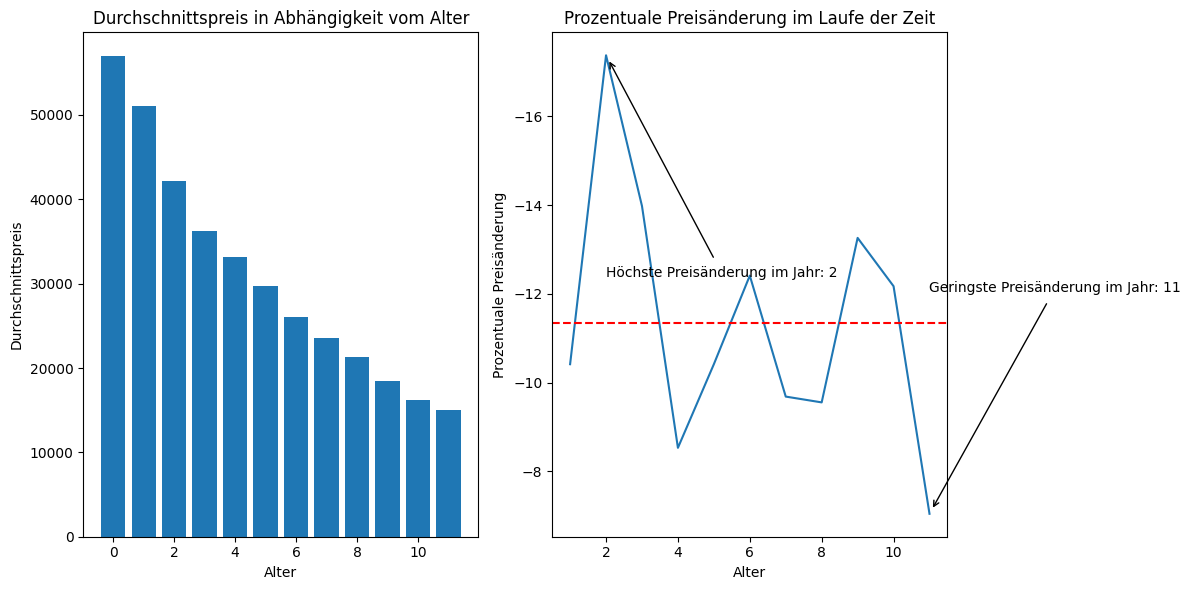

In [48]:
grouped_data = df.groupby('Age')['money'].mean()

# Erstellen der Figure und Axes-Objekte für die Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Erster Plot: Barplot für den Durchschnittspreis in Abhängigkeit vom Alter
ax1.bar(grouped_data.index, grouped_data.values)
ax1.set_xlabel('Alter')
ax1.set_ylabel('Durchschnittspreis')
ax1.set_title('Durchschnittspreis in Abhängigkeit vom Alter')

# Zweiter Plot: Lineplot für die prozentuale Preisänderung im Laufe der Zeit
price_change_percent = grouped_data.pct_change() * 100
ax2.plot(grouped_data.index, price_change_percent)
ax2.axhline(price_change_percent.mean(), color='red', linestyle='--', label='Durchschnitt')
ax2.set_xlabel('Alter')
ax2.set_ylabel('Prozentuale Preisänderung')
ax2.set_title('Prozentuale Preisänderung im Laufe der Zeit')
ax2.invert_yaxis()

max_change_year = price_change_percent.idxmax()
min_change_year = price_change_percent.idxmin()

# Annotationen für das Jahr mit der höchsten Preisänderung
ax2.annotate(f'Geringste Preisänderung im Jahr: {max_change_year}',
             xy=(max_change_year, price_change_percent[max_change_year]),
             xytext=(max_change_year, price_change_percent[max_change_year] - 5),
             arrowprops=dict(arrowstyle='->', color='black', shrinkA=5, shrinkB=5))

# Annotationen für das Jahr mit der geringsten Preisänderung
ax2.annotate(f'Höchste Preisänderung im Jahr: {min_change_year}',
             xy=(min_change_year, price_change_percent[min_change_year]),
             xytext=(min_change_year, price_change_percent[min_change_year] + 5),
             arrowprops=dict(arrowstyle='->', color='black', shrinkA=5, shrinkB=5))

# Platz für den Plot anpassen, damit die Achsentitel nicht überlappen
plt.tight_layout()

# Subplots anzeigen
plt.show()